<a href="https://colab.research.google.com/github/NikhilManjunath/Logistic-Regression-Cat-Recognition/blob/main/Cat_Recognition_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
#Loading the dataset
def load_dataset():
  with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

  with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y =  0
It is a non-cat picture


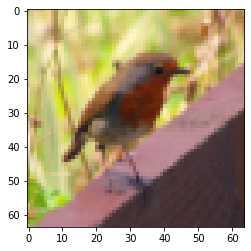

In [ ]:
#verifying the data
index = 10
plt.imshow(train_set_x_orig[index])
print("y = ",train_set_y[0,index])
print('It is a ' + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + ' picture')

In [ ]:
#Understanding the dataset
print('Number of training examples: ', train_set_x_orig.shape[0])
print('Number of testing examples: ', test_set_x_orig.shape[0])
print("Height/Width of each image: ", train_set_x_orig.shape[1])
print('Image Size: ', train_set_x_orig.shape[1:])
print('Train Set X Shape: ', train_set_x_orig.shape)
print('Train Set Y Shape: ', train_set_y.shape)
print('Test Set X Shape: ', test_set_x_orig.shape)
print('Test Set Y Shape: ', test_set_y.shape)

Number of training examples:  209
Number of testing examples:  50
Height/Width of each image:  64
Image Size:  (64, 64, 3)
Train Set X Shape:  (209, 64, 64, 3)
Train Set Y Shape:  (1, 209)
Test Set X Shape:  (50, 64, 64, 3)
Test Set Y Shape:  (1, 50)


In [ ]:
#Reshaping the training and test datasets
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [ ]:
#Standardize the Dataset
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [ ]:
#Building the algorithm
#sigmoid function:
def sigmoid(z):
  s = 1/(1+np.exp(-z))

  return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [ ]:
#Initialization
def initialize_with_zeros(dim):
  w = np.zeros((dim, 1))
  b = 0

  assert(w.shape == (dim, 1))
  assert(isinstance(b, float) or isinstance(b, int))
  return w,b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [ ]:
#Forward and Backward Propagation
def propagate(w,b,X,Y):
  m = X.shape[1]

  #Forward Propagation
  A = sigmoid(np.dot(w.T, X)+b)
  cost = -(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m

  #Backward Propagation
  dz = A-Y
  dw = (np.dot(X,dz.T))/m
  db = (np.sum(dz))/m

  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  grads = {'dw':dw, 
           'db':db}

  return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [ ]:
#Optimization
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  costs = []

  for i in range(num_iterations):

    #Calculate grads and cost
    grads, cost = propagate(w,b,X,Y)

    #retrieve params
    dw = grads['dw']
    db = grads['db']

    #update w,b
    w = w - learning_rate*dw
    b = b - learning_rate*db

    #Recording the costs
    if i % 100 == 0:
      costs.append(cost)
    
    #Print cost after every 100 iterations
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

  params = {'w': w,
              'b': b}

  grads = {'dw': dw, 
             'db':db}

  return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params['w']))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


In [ ]:
#Prediction function
def predict(w,b,X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)

  #Compute A
  A = sigmoid(np.dot(w.T,X)+b)

  for i in range(A.shape[1]):
    if A[0,i] > 0.5:
      Y_prediction[0,i] = 1
    else:
      Y_prediction[0,i] = 0

    assert(Y_prediction.shape == (1,m))

  return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [ ]:
#Model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

  #Initialize w, b
  w,b = initialize_with_zeros(X_train.shape[0])

  #Optimization
  parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)

  #Retrieve params w and b
  w = parameters['w']
  b = parameters['b']

  #prediction
  Y_prediction_train = predict(w,b,X_train)
  Y_prediction_test = predict(w,b,X_test)

  # Print train/test Errors
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

  d = {"costs": costs,
       "Y_prediction_test": Y_prediction_test, 
       "Y_prediction_train" : Y_prediction_train, 
       "w" : w, 
       "b" : b,
       "learning_rate" : learning_rate,
       "num_iterations": num_iterations}
    
  return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


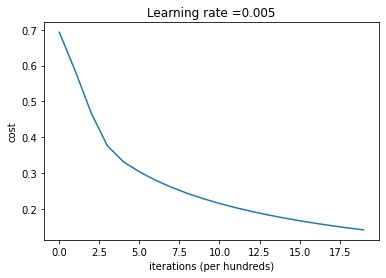

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



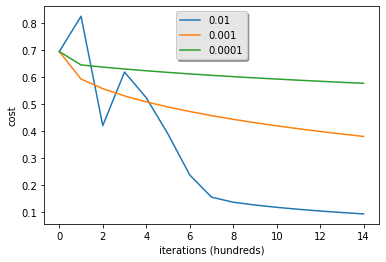

In [ ]:
#Testing with different learning rates
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()